# Handwritten Digits Recognition by using neural networks



In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import pandas as pd


# Load the Fashion-MNIST dataset

In [3]:
mnist = keras.datasets.mnist
# splitting training and test data and corresponding labels 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
class_names = [0, 1, 2, 3, 4,5, 6, 7, 8, 9]
class_dict = {i:class_name for i,class_name in enumerate(class_names)}

In [5]:
def show_image(index):
    plt.figure()
    # cmap=plt.cm.binary allows us to show the picture in grayscale
    plt.imshow(train_images[index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[index]])
    plt.colorbar() # adds a bar to the side with values
    plt.show()

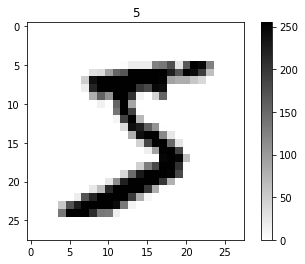

In [6]:
show_image(0)

Data Preprocessing

In [7]:
train_images = train_images/255

test_images = test_images/255

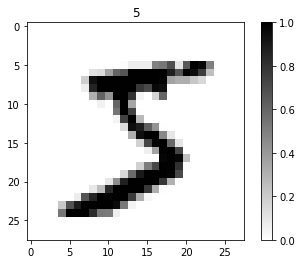

In [8]:
show_image(0)

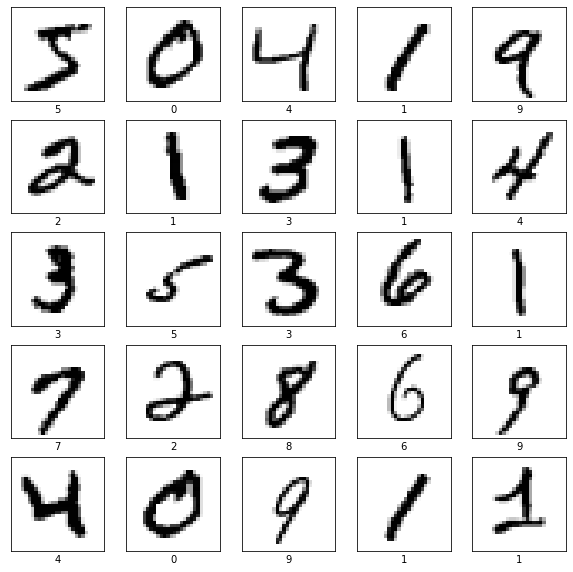

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Data Transformation

In [10]:
print(f'Before reshape, train_images shape: {train_images.shape} test_images shape: {test_images.shape}')
train_images = np.reshape(train_images, (60000,-1))
test_images = np.reshape(test_images, (10000,-1))
print(f'After reshape, train_images shape: {train_images.shape} test_images shape: {test_images.shape}')

Before reshape, train_images shape: (60000, 28, 28) test_images shape: (10000, 28, 28)
After reshape, train_images shape: (60000, 784) test_images shape: (10000, 784)


In [11]:
# Add training data into a dataframe
img_data = {f"z{i}":train_images[:,i] for i in range(784)}
img_data["label"] = train_labels
df_img_train = pd.DataFrame(img_data)
df_img_train["class"] = df_img_train["label"].map(class_dict)
df_img_train.head()

,z0,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20,z21,z22,z23,z24,z25,z26,z27,z28,z29,z30,z31,z32,z33,z34,z35,z36,z37,z38,z39,...,z746,z747,z748,z749,z750,z751,z752,z753,z754,z755,z756,z757,z758,z759,z760,z761,z762,z763,z764,z765,z766,z767,z768,z769,z770,z771,z772,z773,z774,z775,z776,z777,z778,z779,z780,z781,z782,z783,label,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,9


In [12]:
# Add test data into a dataframe
img_data = {f"z{i}":test_images[:,i] for i in range(784)}
img_data["label"] = test_labels
df_img_test = pd.DataFrame(img_data)
df_img_test["class"] = df_img_test["label"].map(class_dict)
df_img_test.head()

,z0,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20,z21,z22,z23,z24,z25,z26,z27,z28,z29,z30,z31,z32,z33,z34,z35,z36,z37,z38,z39,...,z746,z747,z748,z749,z750,z751,z752,z753,z754,z755,z756,z757,z758,z759,z760,z761,z762,z763,z764,z765,z766,z767,z768,z769,z770,z771,z772,z773,z774,z775,z776,z777,z778,z779,z780,z781,z782,z783,label,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4


# Neural Network

In [13]:
# A function for getting a subset of the data
def get_data_subset(df, classes=[], shuffle=True, shuffle_seed=42):
    """
    Used to retrieve columns from df
    """
    if classes == []:
        print("Pleas")
    else:
        df_filtered = df[(df["class"] == classes[0]) | (df["class"] == classes[1])].copy()
        df_filtered["binary_label"] = 0
        df_filtered.loc[df["class"] == classes[1], "binary_label"] = 1
        data = df_filtered.filter(regex=("z[0-9]+")).values
        labels = df_filtered["binary_label"].values
        if shuffle:
            np.random.seed(shuffle_seed)
            np.random.shuffle(data)
            np.random.seed(shuffle_seed)
            np.random.shuffle(labels)

    return data, labels.reshape(-1,1)

In [14]:
# Preparing data for training, use get_data_subset along with df_img_train

X, y = get_data_subset(df_img_train,class_names)

In [15]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import * 

def build_model1():
    input_layer = Input(shape=(784))
    x = Dense(25, activation='tanh')(input_layer)
    x = Dense(5, activation='tanh')(x)    
    x = Dense(5, activation='tanh')(x)
    x = Dense(10, activation='softmax')(x)
    return Model(input_layer, x)

model = build_model1()

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 25)                19625     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 130       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                60        
Total params: 19,845
Trainable params: 19,845
Non-trainable params: 0
_________________________________________________________________


In [16]:
optimizer = Adam()
model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy() ,metrics=['accuracy'])

In [17]:
hist = model.fit(X, y, epochs=5, validation_split=0.2)

Epoch 1/5
317/317 [==============================] - 1s 2ms/step - loss: 0.8598 - accuracy: 0.9125 - val_loss: 0.3294 - val_accuracy: 0.9980
Epoch 2/5
317/317 [==============================] - 1s 2ms/step - loss: 0.2013 - accuracy: 0.9989 - val_loss: 0.1269 - val_accuracy: 0.9984
Epoch 3/5
317/317 [==============================] - 1s 2ms/step - loss: 0.0932 - accuracy: 0.9993 - val_loss: 0.0709 - val_accuracy: 0.9988
Epoch 4/5
317/317 [==============================] - 1s 2ms/step - loss: 0.0561 - accuracy: 0.9991 - val_loss: 0.0472 - val_accuracy: 0.9984
Epoch 5/5
317/317 [==============================] - 1s 2ms/step - loss: 0.0374 - accuracy: 0.9991 - val_loss: 0.0332 - val_accuracy: 0.9992


In [19]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

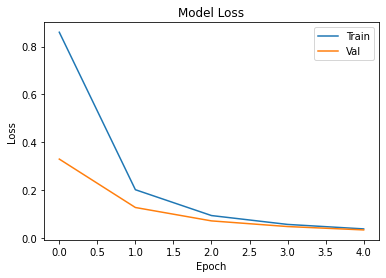

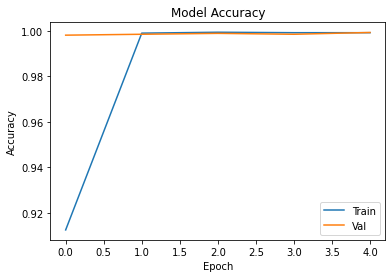

In [20]:
# Plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)